In [ ]:
#Data Preparation and Ensuring the data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv("/content/titanic.csv", sep=',')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df['Travelalone'] = np.where((df['SibSp']+df['Parch']) > 0, 0, 1).astype('uint8')

In [ ]:
df1=df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1)

In [ ]:
df1.isna().sum()

Survived         0
Pclass           0
Sex              0
Age            177
Fare             0
Embarked         2
Travelalone      0
dtype: int64

In [ ]:
df['Age'].fillna(df1['Age'].median(skipna=True), inplace=True)

In [ ]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Travelalone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [ ]:
df_titanic=pd.get_dummies(df1, columns=['Pclass','Embarked', 'Sex'], drop_first=True)

In [ ]:
df_titanic.head()

,Survived,Age,Fare,Travelalone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,1,0,1,1


In [ ]:
X=df_titanic.drop(['Survived'], axis=1)
Y=df_titanic['Survived']

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
trans_MM = MinMaxScaler()
trans_SS = StandardScaler()

In [ ]:
df_MM=trans_MM.fit_transform(X)
pd.DataFrame(df_MM)

,0,1,2,3,4,5,6,7
0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,1.0
1,0.472229,0.139136,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,1.0,0.0,1.0,0.0,1.0,0.0
3,0.434531,0.103644,0.0,0.0,0.0,0.0,1.0,0.0
4,0.434531,0.015713,1.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,1.0,1.0,0.0,0.0,1.0,1.0
887,0.233476,0.058556,1.0,0.0,0.0,0.0,1.0,0.0
888,NaN,0.045771,0.0,0.0,1.0,0.0,1.0,0.0
889,0.321438,0.058556,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df_SS = trans_SS.fit_transform(X)
pd.DataFrame(df_SS)

,0,1,2,3,4,5,6,7
0,-0.530377,-0.502445,-1.231645,-0.510152,0.902587,-0.307562,0.619306,0.737695
1,0.571831,0.786845,-1.231645,-0.510152,-1.107926,-0.307562,-1.614710,-1.355574
2,-0.254825,-0.488854,0.811922,-0.510152,0.902587,-0.307562,0.619306,-1.355574
3,0.365167,0.420730,-1.231645,-0.510152,-1.107926,-0.307562,0.619306,-1.355574
4,0.365167,-0.486337,0.811922,-0.510152,0.902587,-0.307562,0.619306,0.737695
...,...,...,...,...,...,...,...,...
886,-0.185937,-0.386671,0.811922,1.960202,-1.107926,-0.307562,0.619306,0.737695
887,-0.737041,-0.044381,0.811922,-0.510152,-1.107926,-0.307562,0.619306,-1.355574
888,NaN,-0.176263,-1.231645,-0.510152,0.902587,-0.307562,0.619306,-1.355574
889,-0.254825,-0.044381,0.811922,-0.510152,-1.107926,-0.307562,-1.614710,0.737695


In [ ]:
#Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [ ]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read the given CSV file, and view some sample records
advertising = pd.read_csv( "advertising.csv" )
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


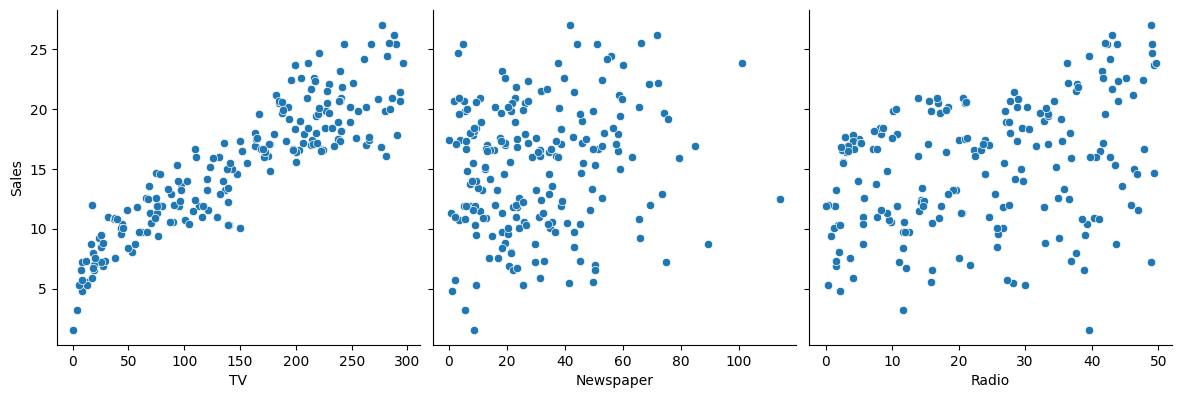

In [ ]:
#Importing seaborn library for visualizations
#import seaborn as sns
#to plot all the scatterplots in a single plot
sns.pairplot(advertising, x_vars= ['TV', 'Newspaper', 'Radio'], y_vars='Sales', size=4, kind='scatter')
plt.show()

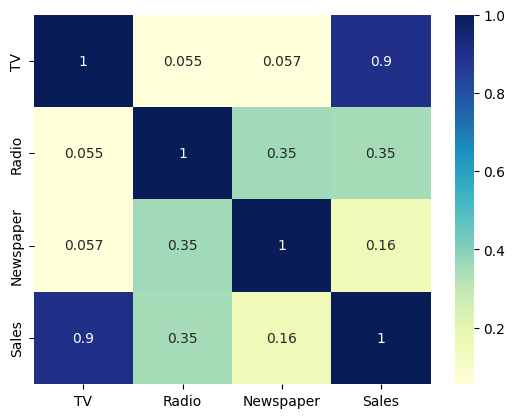

In [ ]:
#To plot heatmap to find out correlations
sns.heatmap(advertising.corr(), cmap = 'YlGnBu', annot = True )
plt.show()

In [ ]:
X = advertising[ 'TV' ]
y = advertising[ 'Sales' ]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.7, test_size = 0.3, random_state = 100 )

In [ ]:
print( X_train.shape )
print( X_test.shape )
print( y_train.shape )
print( y_test.shape )

(140,)
(60,)
(140,)
(60,)


In [ ]:
import statsmodels.api as sm

In [ ]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)
# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
# Print the parameters,i.e. intercept and slope of the regression line obtained
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
#Performing a summary operation lists out all different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           1.52e-52
Time:                        13:18:41   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

In [ ]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)
# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [ ]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [ ]:
#Imporitng libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

# RMSE value
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# R-squared value
print("R-squared:", r2_score(y_test, y_pred))

RMSE: 2.019296008966232
R-squared: 0.792103160124566


In [ ]:
#Linear Regression Again

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [ ]:
# Get dataset
df_sal = pd.read_csv('Salary_Data.csv')
df_sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
# Describe data
df_sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


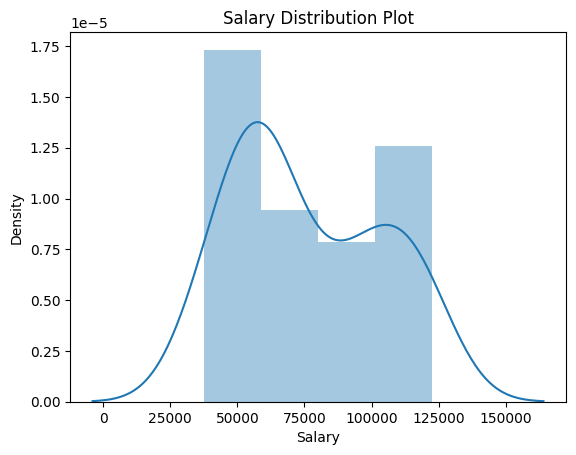

In [ ]:
# Data distribution
plt.title('Salary Distribution Plot')
sns.distplot(df_sal['Salary'])
plt.show()

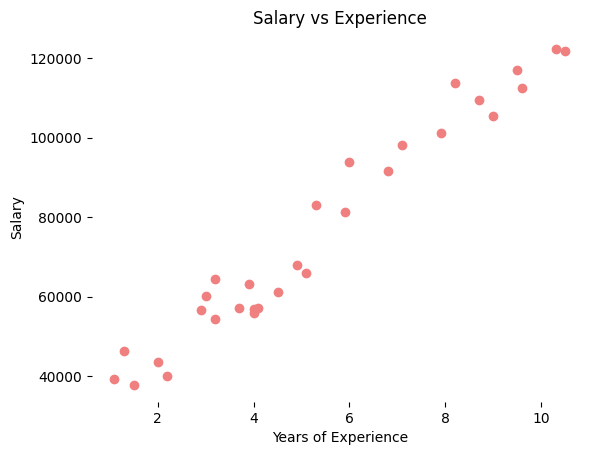

In [ ]:
# Relationship between Salary and Experience
plt.scatter(df_sal['YearsExperience'], df_sal['Salary'], color = 'lightcoral')
plt.title('Salary vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.box(False)
plt.show()

In [ ]:
# Splitting variables
X = df_sal.iloc[:, :1]  # independent
y = df_sal.iloc[:, 1:]  # dependent

In [ ]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

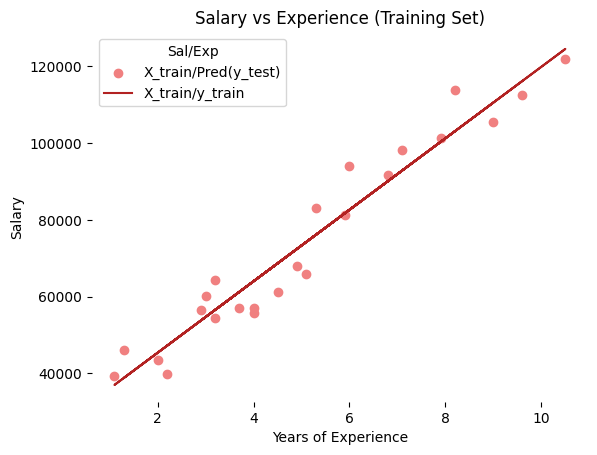

In [ ]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

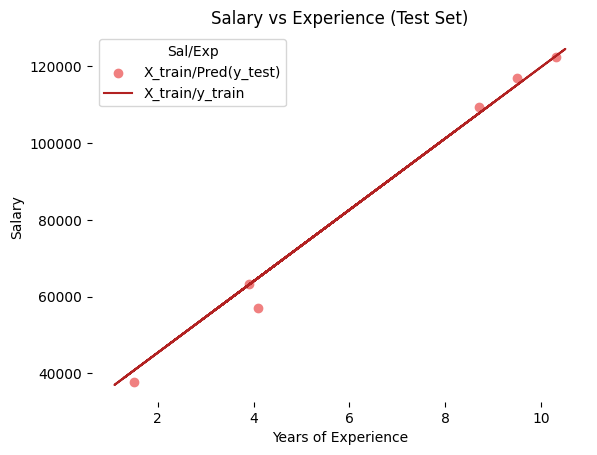

In [ ]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [ ]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[9312.57512673]]
Intercept: [26780.09915063]


In [ ]:
#Logisic Regression

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

In [ ]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [ ]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [ ]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 25,  42]])

Text(0.5, 257.44, 'Predicted label')

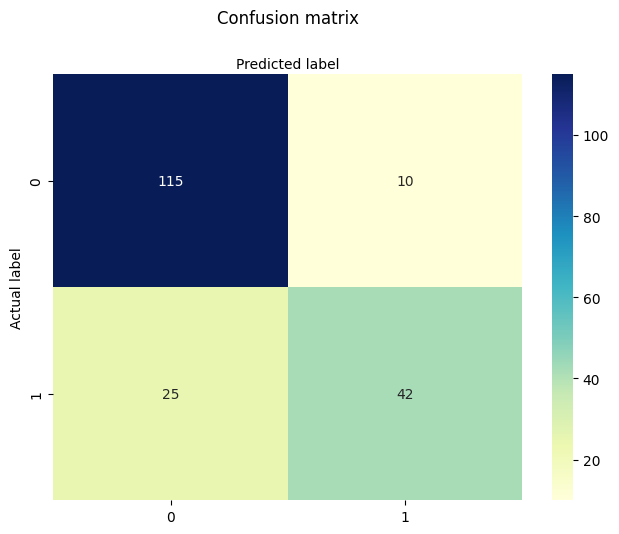

In [ ]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import Text class
from matplotlib.pyplot import Text

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label')

Confusion Matrix Evaluation

In [ ]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.92      0.87       125
   with diabetes       0.81      0.63      0.71        67

        accuracy                           0.82       192
       macro avg       0.81      0.77      0.79       192
    weighted avg       0.82      0.82      0.81       192



ROC Curve

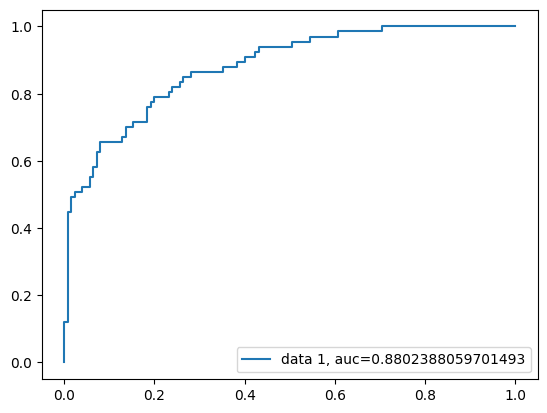

In [ ]:

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

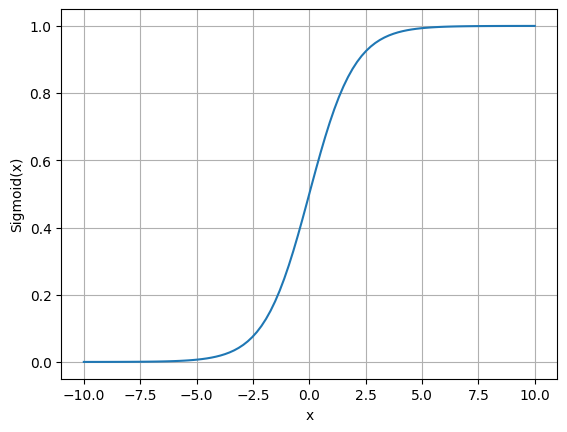

In [ ]:
#Sigmoid Curve
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
  return 1/(1+np.exp(-x))

x=np.linspace(-10,10,100)
plt.plot(x, sigmoid(x))
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.grid()
plt .show()

In [ ]:
#Polynomial Regression

In [ ]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

#importing datasets
data_set= pd.read_csv('/content/position-salaries data.csv')

#Extracting Independent and dependent Variable
x= data_set.iloc[:, 1:2].values
y= data_set.iloc[:, 2].values
data_set

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
#Fitting the Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_regs= LinearRegression()
lin_regs.fit(x,y)

LinearRegression()

In [ ]:
#Fitting the Polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_regs= PolynomialFeatures(degree= 2)
x_poly= poly_regs.fit_transform(x)
lin_reg_2 =LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression()

In [ ]:
x_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

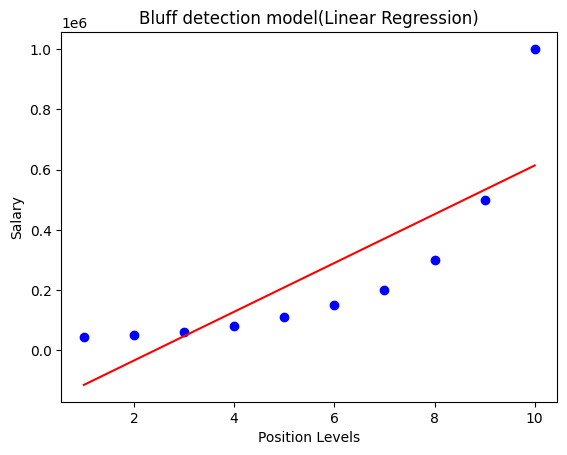

In [ ]:
#Visulaizing the result for Linear Regression model
mtp.scatter(x,y,color="blue")
mtp.plot(x,lin_regs.predict(x), color="red")
mtp.title("Bluff detection model(Linear Regression)")
mtp.xlabel("Position Levels")
mtp.ylabel("Salary")
mtp.show()

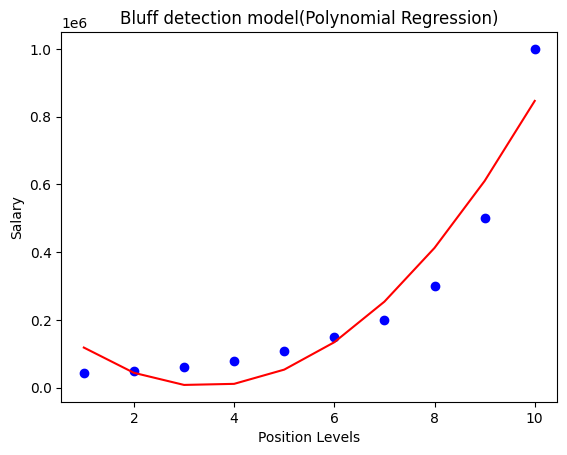

In [ ]:
#Visulaizing the result for Polynomial Regression
mtp.scatter(x,y,color="blue")
mtp.plot(x, lin_reg_2.predict(poly_regs.fit_transform(x)), color="red")
mtp.title("Bluff detection model(Polynomial Regression)")
mtp.xlabel("Position Levels")
mtp.ylabel("Salary")
mtp.show()

In [ ]:
#Predicting the final result with the Linear Regression model:
lin_pred = lin_regs.predict([[6.5]])
print(lin_pred)

[330378.78787879]


In [ ]:
#Predicting the final result with the Polynomial Regression model:
poly_pred = lin_reg_2.predict(poly_regs.fit_transform([[6.5]]))
print(poly_pred)

[189498.10606061]


In [ ]:
#Decision Tree Regression

<ipython-input-5-b8bef1e970a2>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid=np.arange(min(X),max(X)+0.1+0.01).reshape(-1,1)


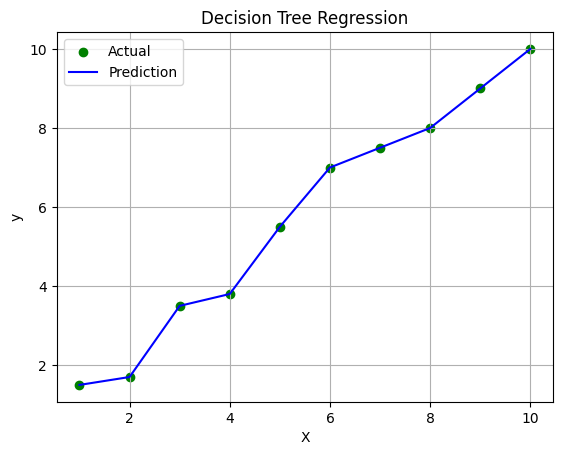

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

X=np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
y=np.array([1.5,1.7,3.5,3.8,5.5,7.0,7.5,8.0,9.0,10.0])

regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X,y)

X_grid=np.arange(min(X),max(X)+0.1+0.01).reshape(-1,1)
y_pred=regressor.predict(X_grid)

plt.scatter(X,y,color='green',label='Actual')
plt.plot(X_grid,y_pred,color='blue',label='Prediction')
plt.title('Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Random Forest Regression

<ipython-input-6-70e0b21f773b>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid=np.arange(min(X),max(X)+0.1+0.01).reshape(-1,1)


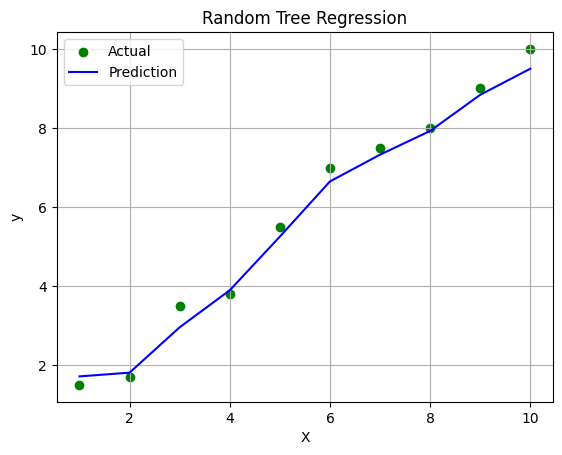

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

X=np.array([[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]])
y=np.array([1.5,1.7,3.5,3.8,5.5,7.0,7.5,8.0,9.0,10.0])

rf_regressor=RandomForestRegressor(n_estimators=100,random_state=0)
rf_regressor.fit(X,y)

X_grid=np.arange(min(X),max(X)+0.1+0.01).reshape(-1,1)
y_pred=rf_regressor.predict(X_grid)

plt.scatter(X,y,color='green',label='Actual')
plt.plot(X_grid,y_pred,color='blue',label='Prediction')
plt.title('Random Tree Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Naive Bayes Classification

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

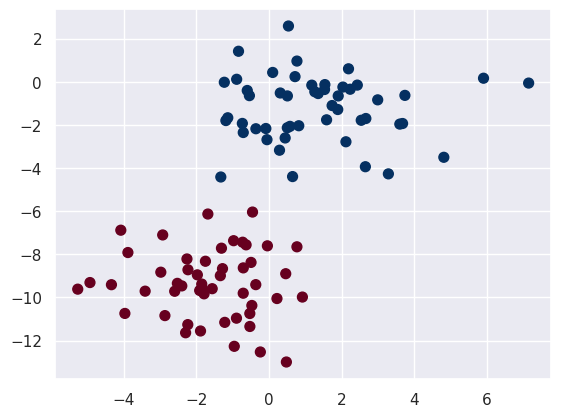

In [ ]:
from sklearn.datasets import make_blobs
X, y= make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:,0],X[:,1], c=y, s=50, cmap='RdBu')

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X, y)

GaussianNB()

In [ ]:
rng=np.random.RandomState(0)
Xnew=[-6,-14]+[14, 18]*rng.rand(2000,2)
ynew=model.predict(Xnew)

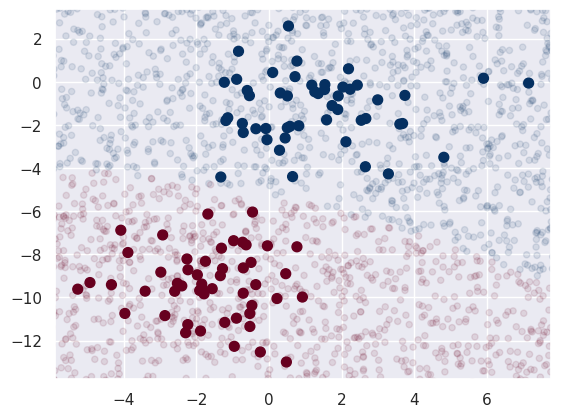

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='RdBu')
lim=plt.axis()
plt.scatter(Xnew[:,0], Xnew[:,1], c=ynew, s=20, cmap='RdBu',alpha=0.1)
plt.axis(lim);

In [ ]:
#Gradient Descent

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
bc=datasets.load_breast_cancer()
X=bc.data
y=bc.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
class CustomPerceptron(object):

  def __init__(self, n_iterations=100,random_state=1,learning_rate=0.01):
    self.n_iterations=n_iterations
    self.random_state=random_state
    self.learning_rate=learning_rate

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.coef_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        for _ in range(self.n_iterations):
            # Code for training the perceptron

           for xi, expected_value in zip(X, y):
              predicted_value=self.predict(xi)
              self.coef[1:] += self.learning_rate * (expected_value - predicted_value) * xi
              self.coef[0] += self_learning_rate * (expected_value - predicted_value) * 1


    def activation(self, X):
       return np.dot(X, self.coef_[1:]) + self.coef_[0]

    def predict(self, X):
       output = self.activation(X)
       return np.where(output >= 0.0, 1, 0)

    def score(self, X, y):
       misclassified_data_count=0
       for xi, target in zip(X, y):
          output = self.predict(xi)
          if(target != output):
            misclassified_data_count += 1
          total_data_count = len(X)
          self.score = (total_data_count - misclassified_data_count)/total_data_count
          return self.score_

In [ ]:
n_iterations=100
learning_rate=0.01

In [ ]:
prcptrn = CustomPerceptron()
prcptrn.fit(X_train, y_train)

In [ ]:
print(prcptrn.score(X_test, y_test))
prcptrn.score(X_train, y_train)

In [ ]:
#KNN(K-Nearest Neighbors)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
gender = pd.get_dummies(df['Gender'], drop_first=True)
df=pd.concat([df, gender], axis=1)

In [ ]:
df.drop(['Gender'], axis=1, inplace=True)

In [ ]:
X=df[['Age', 'EstimatedSalary', 'Male']]
y=df['Purchased']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)

StandardScaler()

In [ ]:
scaled_features = scaler.transform(X)
scaled_features

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [ ]:
df_feat=pd.DataFrame(scaled_features, columns=X.columns)
df_feat.head()

,Age,EstimatedSalary,Male
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred=knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, pred)

array([[45,  3],
       [ 4, 28]])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93        48
           1       0.90      0.88      0.89        32

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



In [ ]:
#Decision Tree Classification

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/balance-scale.csv',sep=',')
df.head()

,Class,L-Weight,L-Distance,R-Weight,R-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       625 non-null    object
 1   L-Weight    625 non-null    int64 
 2   L-Distance  625 non-null    int64 
 3   R-Weight    625 non-null    int64 
 4   R-Distance  625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X=df.drop('Class', axis=1)
y=df[['Class']]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [ ]:
clf_model=DecisionTreeClassifier(criterion="gini",random_state=42,max_depth=3,min_samples_leaf=5)
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [ ]:
y_pred=clf_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 0  8 10]
 [ 0 62 18]
 [ 0 20 70]]
              precision    recall  f1-score   support

           B       0.00      0.00      0.00        18
           L       0.69      0.78      0.73        80
           R       0.71      0.78      0.74        90

    accuracy                           0.70       188
   macro avg       0.47      0.52      0.49       188
weighted avg       0.64      0.70      0.67       188



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
target=list(df['Class'].unique())
feature_names=list(X.columns)

In [ ]:
from sklearn.tree import export_text
r=export_text(clf_model,feature_names=feature_names)
print(r)

|--- L-Weight <= 2.50
|   |--- R-Distance <= 1.50
|   |   |--- L-Distance <= 2.50
|   |   |   |--- class: R
|   |   |--- L-Distance >  2.50
|   |   |   |--- class: L
|   |--- R-Distance >  1.50
|   |   |--- R-Weight <= 2.50
|   |   |   |--- class: R
|   |   |--- R-Weight >  2.50
|   |   |   |--- class: R
|--- L-Weight >  2.50
|   |--- L-Distance <= 2.50
|   |   |--- R-Weight <= 2.50
|   |   |   |--- class: L
|   |   |--- R-Weight >  2.50
|   |   |   |--- class: R
|   |--- L-Distance >  2.50
|   |   |--- R-Distance <= 3.50
|   |   |   |--- class: L
|   |   |--- R-Distance >  3.50
|   |   |   |--- class: L



In [ ]:
#Random Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error,r2_score

In [ ]:
datasets=pd.read_csv('petrol_consumption.csv')
datasets.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [ ]:
!pip install pandas
!pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
print(X.shape)
print(y.shape)

(0, 5)
(48,)


In [ ]:
X=datasets.iloc[: 0:4].values
y=datasets.iloc[:, 4].values


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
print(y_train[:10])

    Class
204     L
88      R
522     R
117     R
416     B
441     L
33      R
0       B
617     L
333     L


In [ ]:
regressor=RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)

In [ ]:
print('Train MAE',mean_absolute_error(y_train,regressor.predict(X_train)))
print('Train RMSE:', np.sqrt(mean_squared_error(y_train,regressor.predict(X_train))))\
print('R Square:',r2_score(y_train,regressor.predict(X_train)))

In [ ]:
print('Train MAE:', mean_absolute_error(y_test,regressor.predict(X_test)))
print('Train RMSE:', np.sqrt(mean_squared_error(y_test,regressor.predict(X_test))))
print('R Squared:', r2_score(y_test,regressor.predict(X_test)))

In [ ]:
#SVM(Support Vector Machines)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Age-Cholesterol plot')

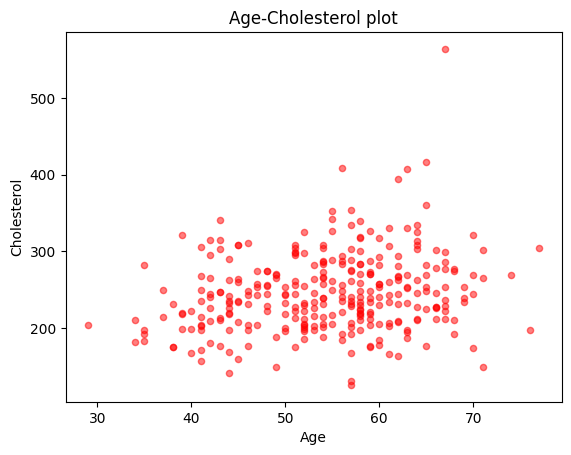

In [ ]:
df.plot(kind='scatter',x='age',y='chol',alpha=0.5,color='red')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age-Cholesterol plot')

In [ ]:
df_new=pd.get_dummies(df,columns=['cp','thal'],drop_first=True)

In [ ]:
X=df_new.drop('target',axis=1)
y=df_new.target

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [ ]:
from sklearn.model_selection import GridSearchCV
ml=svm.SVC()
para_grid={'C' : [1,10,100,1000], 'gamma' :[1,0.1,0.01,0.001], 'kernel':['rbf']}
grid=GridSearchCV(ml,para_grid,refit=True,verbose=1,cv=5,n_jobs=-1)
grid_search=grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
print(grid_search.best_params_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
accuracy=grid_search.best_score_

In [ ]:
accuracy

0.5946428571428571

In [ ]:
y_test_hat=grid.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_test_hat)
disp=confusion_matrix(grid,X_test,y_test, cmap=plt.cm.Blues)

In [ ]:
#Hierarchical Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

In [ ]:
df1=df.iloc[:, 3:5].values

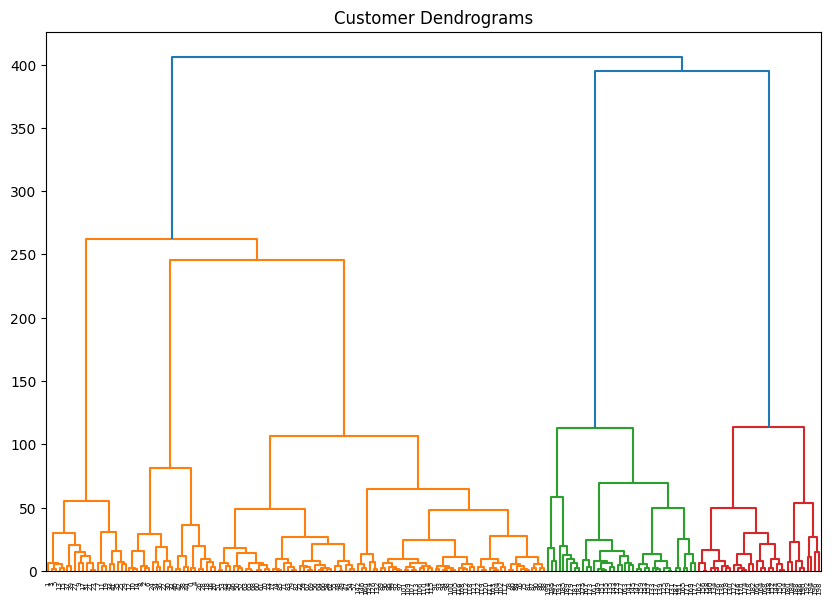

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df1,method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='ward')
lables_=model.fit_predict(df1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
lables_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

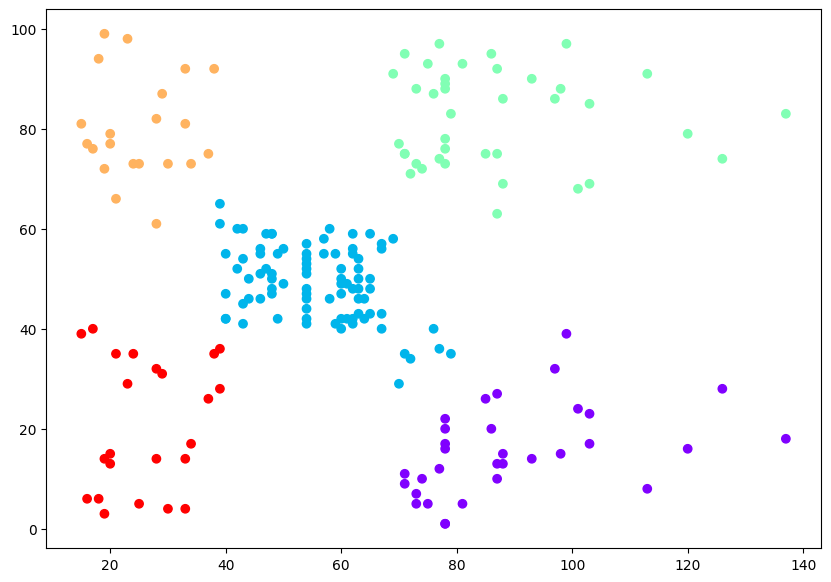

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(df1[:,0], df1[:,1], c=model.labels_, cmap='rainbow')

In [ ]:
#K-Means Clustering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
model=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=model.fit_predict(df.iloc[:,[3,4]].values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


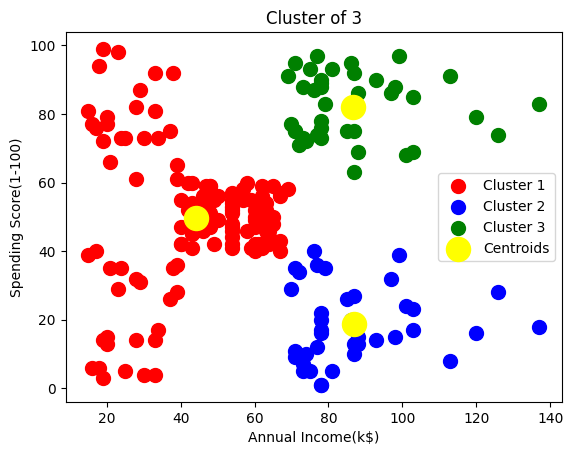

In [ ]:
# Create a KMeans model with 3 clusters
model = KMeans(n_clusters=3)

# Fit the model to the data
model.fit(X)

# Plot the clusters
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans ==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans ==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans ==2,1], s=100, c='green', label='Cluster 3')
plt.scatter(model.cluster_centers_[:, 0],model.cluster_centers_[:, 1],s=300, c='yellow', label='Centroids')
plt.title('Cluster of 3')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

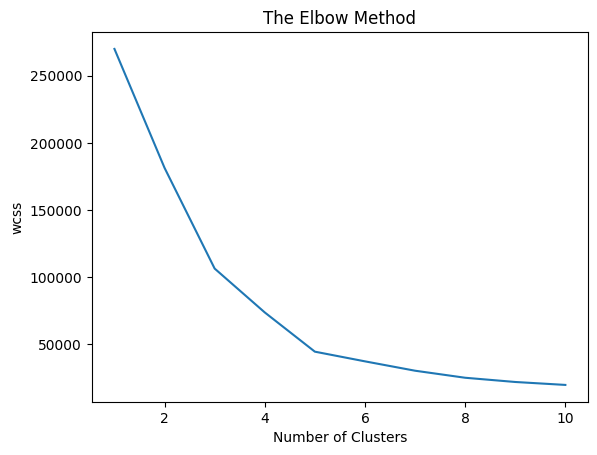

In [ ]:
wcss=[]
for i in range(1,11):
  model=KMeans(n_clusters=i,init='k-means++',random_state=42)
  model.fit(X)
  wcss.append(model.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
model=KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans=model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


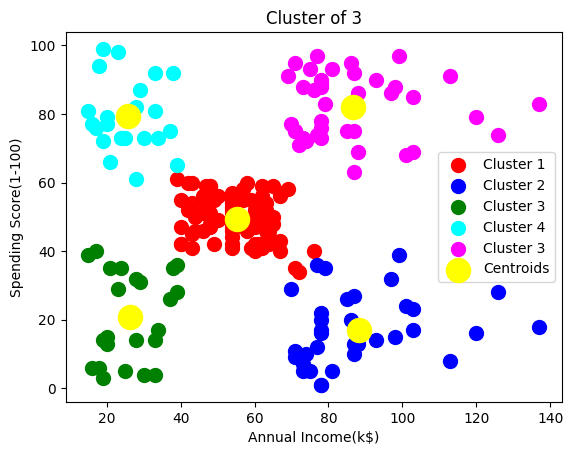

In [ ]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans ==0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans ==1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans ==2,1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans ==3,1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans ==4,1], s=100, c='magenta', label='Cluster 5')
plt.scatter(model.cluster_centers_[:, 0],model.cluster_centers_[:, 1],s=300, c='yellow', label='Centroids')
plt.title('Cluster of 5')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

In [ ]:
#KNN for Anomaly Detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [ ]:
data=pd.read_csv("http://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
df=data[['sepal_length','sepal_width']]

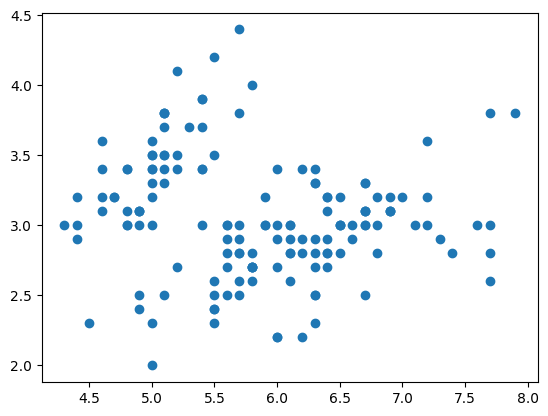

In [ ]:
plt.scatter(df['sepal_length'], df['sepal_width'])

In [ ]:
X=df.values
nbrs=NearestNeighbors(n_neighbors=3)
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

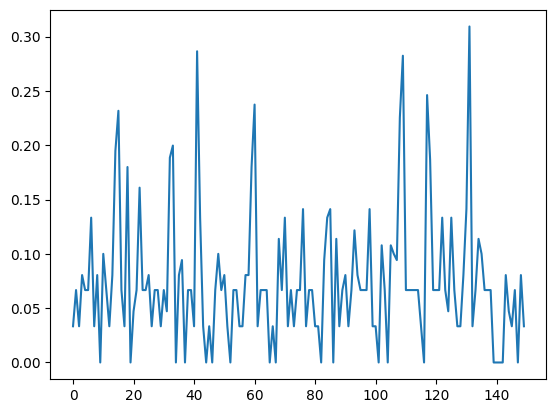

In [ ]:
distances,indexes=nbrs.kneighbors(X)
plt.plot(distances.mean(axis=1))

In [ ]:
outlier_index=np.where(distances.mean(axis=1)>0.15)
outlier_index

(array([ 14,  15,  18,  22,  32,  33,  41,  59,  60, 108, 109, 117, 118,
        131]),)

In [ ]:
outlier_values=df.iloc[outlier_index]
outlier_values

,sepal_length,sepal_width
14,5.8,4.0
15,5.7,4.4
18,5.7,3.8
22,4.6,3.6
32,5.2,4.1
33,5.5,4.2
41,4.5,2.3
59,5.2,2.7
60,5.0,2.0
108,6.7,2.5


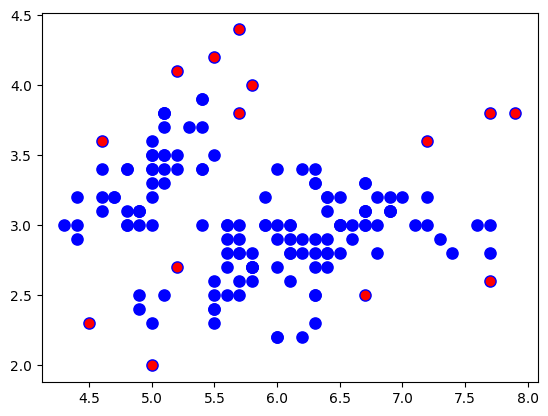

In [ ]:
plt.scatter(df['sepal_length'],df['sepal_width'], color='b', s=65)
plt.scatter(outlier_values['sepal_length'], outlier_values['sepal_width'], color='r')

In [ ]:
#SCIKIT LEARN

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline



In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

ENSEMBLE LEARNING

In [ ]:
#Bagging Demo

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

In [ ]:
url="http://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names=['preg','plas','skin','test','mass','pedi','age','class']
data=pd.read_csv(url, names=names)
data.head()

In [ ]:
aray=data.values
X=aray[:, 0:8]
y=aray[:, 7]

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold=KFold(n_splits=10)
cart=DecisionTreeClassifier()
num_trees=100

In [ ]:
model=BaggingClassifier(base_estimator=cart, n_estimators=num_trees,random_state=12)
results=cross_val_score(model, X, y, cv=kfold)
print(results.mean())

In [ ]:
#Boosting Demo

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df=pd.DataFrame(load_breast_cancer()['data'],columns=load_breast_cancer()['feature_names'])
df['y']=load_breast_cancer()['target']
df.head()

In [ ]:
X,y=df.drop('y',axis=1),df.y
kf=KFold(n_splits=5,random_state=42,shuffle=True)
for train_index, val_index in kf.split(X):
  X_train, X_val=X.iloc[train_index], X.iloc[val_index],
  y_train, y_val=y.iloc[train_index], y.iloc[val_index],

In [ ]:
gradient_booster=GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.get_params()

In [ ]:
gradient_booster.fit(X_train,y_train)
print(classification_report(y_val,gradient_booster.predict(X_val)))

In [ ]:
#Stacking Demo

In [ ]:
import datetime

# Create a datetime object
dt_object = datetime.datetime.now()

# Print the date and time
print(dt_object)

In [ ]:
!pip install vecstack

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

In [ ]:
link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
names=['Class','Alcohol','Malic acid','Ash',
       'Alcalinity of ash','Magnesium','Total phenols',
       'Flavonoids','Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wins',
       'Proline']

df=pd.read_csv(link,header=None,names=names)
df.head()

In [ ]:
X=df.iloc[:,1:]
y=df[['Class']]
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
models=[KNeighborsClassifier(n_neighbors=5, n_jobs=-1), RandomForestClassifier(random_state=0, n_jobs=-1, n_estimators=100, max_depth=5),
        XGBClassifier(random_state=0,n_jobs=-1, learning_rate=0.1, n_estimators=100, max_depth=5)]